<a href="https://colab.research.google.com/github/Suvarnaph/hello-world/blob/master/Image_Loader_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

#project_path = "/content/drive/My Drive/AIML/Capstone_Team/MURA-v1.1/"
project_path = "/content/drive/My Drive/AIML/Capstone/MURA-v1.1/"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
#!ls

drive  sample_data


In [0]:
# Structure of image Path - Train
#MURA-v1.1\train\XR_ELBOW\patient00011\study1_negative\image1.png
#content/drive/My Drive/MURA-v1.1/train/XR_ELBOW

In [0]:
# Structure of image Path - Test
#MURA-v1.1\valid\XR_ELBOW\patient11186\study1_positive\image1.png

In [0]:
##First Import the Zip file contents of train and validation
train_path = project_path + 'train.zip'
test_path = project_path + 'test.zip'


In [0]:
from zipfile import ZipFile
with ZipFile(train_path,'r') as f:
  f.extractall()

In [0]:
from zipfile import ZipFile
with ZipFile(test_path,'r') as f:
  f.extractall()

In [0]:
#Now folders are ready
# MURA-v1.1
#---train
#-----StudyType : Ex: #xr_shoulder, etc
#--------Patient : Ex:patient00011 etc
#-----------Positive or negative : Ex: study1_positive or study1_negative - But here we have a catch , we have multiple images with different views having same label(+/-)
#--------------Image itself : Ex: image1.png
#---test
#-----StudyType : Ex: #xr_shoulder, etc
#--------Patient : Ex:patient00011 etc
#-----------Positive or negative : Ex: study1_positive or study1_negative - But here we have a catch , we have multiple images with different views having same label(+/-)
#--------------Image itself : Ex: image1.png

In [0]:
#Reading sample patient information

In [0]:
 from __future__ import absolute_import, division, print_function
from pathlib import Path
import re
import os
from os import getcwd
from os.path import exists, isdir, isfile, join
import shutil
import numpy as np
import pandas as pd

In [3]:
root = Path(project_path)
print(root)
for folders in root.iterdir():
  print(folders)

/content/drive/My Drive/AIML/Capstone/MURA-v1.1
/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train


In [4]:

train_dir = root/'train/' #create train path
print(train_dir)

test_dir = root/'valid/' #create valid(test) path
print(test_dir)

/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train
/content/drive/My Drive/AIML/Capstone/MURA-v1.1/valid


In [1]:
#can be removed at last
from google.colab import drive
drive.mount('/content/drive/')

#project_path = "/content/drive/My Drive/AIML/Capstone_Team/MURA-v1.1/"
project_path = "/content/drive/My Drive/AIML/Capstone/MURA-v1.1/"

from __future__ import absolute_import, division, print_function
from pathlib import Path
import re
import os
from os import getcwd
from os.path import exists, isdir, isfile, join
import shutil
import numpy as np
import pandas as pd

root = Path(project_path)
#print(root)
#for folders in root.iterdir():
  #print(folders)

train_dir = root/'train/' #create train path
#print(train_dir)

test_dir = root/'valid/' #create valid(test) path
#print(test_dir)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import glob
import cv2


def label_img(img):
    word_label = os.path.basename(os.path.dirname(img))
    print(word_label)
    if word_label == 'study1_positive': return 1
    elif word_label == 'study1_negative': return 0


In [3]:
x_train = []
y_train = []

for study_category in train_dir.iterdir():
  print(study_category)
  patient_list = sum(1 for _ in study_category.iterdir()) # converting number of patients to list
  print(patient_list)
  for patient_id in study_category.iterdir():
    print(patient_id)
    for study_type in patient_id.iterdir():
      print(study_type)
      filelist = list(study_type.glob('**/*.png'))
      print(filelist)
      print(len(filelist))
      for fname in filelist:
        class_label= label_img(fname)
        print(class_label)
        for file in glob.glob(str(fname)):
          print(file)
          #temp = cv2.imread(file)
          #print(type(temp))
          temp = cv2.imread(file,0)
          print(type(temp))
          #print('The shape of img without second arg is: {}'.format(temp.shape))
          print('The shape of img_single_channel is: {}'.format(temp.shape))
          #cv2.imshow('Displayimage', temp)
          #wait for 1 second
          #k = cv2.waitKey(100)
          #cv2.destroyWindow('Displayimage')
        #x_train.append(temp)
      #y_train.append(class_label)
      

/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND
2
/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND/patient00008
/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND/patient00008/study1_positive
[PosixPath('/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND/patient00008/study1_positive/image1.png'), PosixPath('/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND/patient00008/study1_positive/image2.png'), PosixPath('/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND/patient00008/study1_positive/image3.png')]
3
study1_positive
1
/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND/patient00008/study1_positive/image1.png
<class 'numpy.ndarray'>
The shape of img_single_channel is: (512, 406)
study1_positive
1
/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND/patient00008/study1_positive/image2.png
<class 'numpy.ndarray'>
The shape of img_single_channel is: (512, 406)
study1_positive
1
/content/drive/My D

The shape of img_single_channel is: (512, 406, 3)


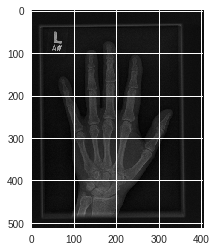

The shape of img_single_channel is: (512, 406)


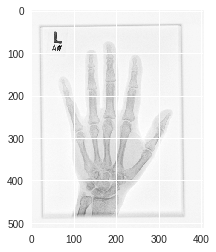

The shape of img_single_channel is: (512, 406, 3)


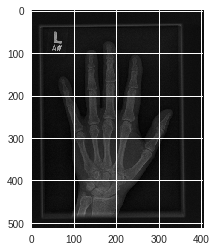

The shape of img_single_channel is: (512, 406, 3)


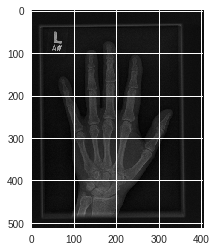

In [13]:
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
import cv2
file = '/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND/patient00008/study1_positive/image3.png'
image1 = cv2.imread(file,1)
print('The shape of img_single_channel is: {}'.format(image1.shape))
plt.imshow(image1)
plt.show()
image0 = cv2.imread(file,0)
print('The shape of img_single_channel is: {}'.format(image0.shape))
plt.imshow(image0)
plt.show()

image_1 = cv2.imread(file,-1)
print('The shape of img_single_channel is: {}'.format(image_1.shape))
plt.imshow(image_1)
plt.show()

image_11 = cv2.imread(file,cv2.IMREAD_UNCHANGED)
print('The shape of img_single_channel is: {}'.format(image_11.shape))
plt.imshow(image_11)
plt.show()

In [194]:
x_train[4].shape


(512, 397, 3)